In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading the file
df = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [5]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [6]:
df.shape

(126, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


Visualizing the data

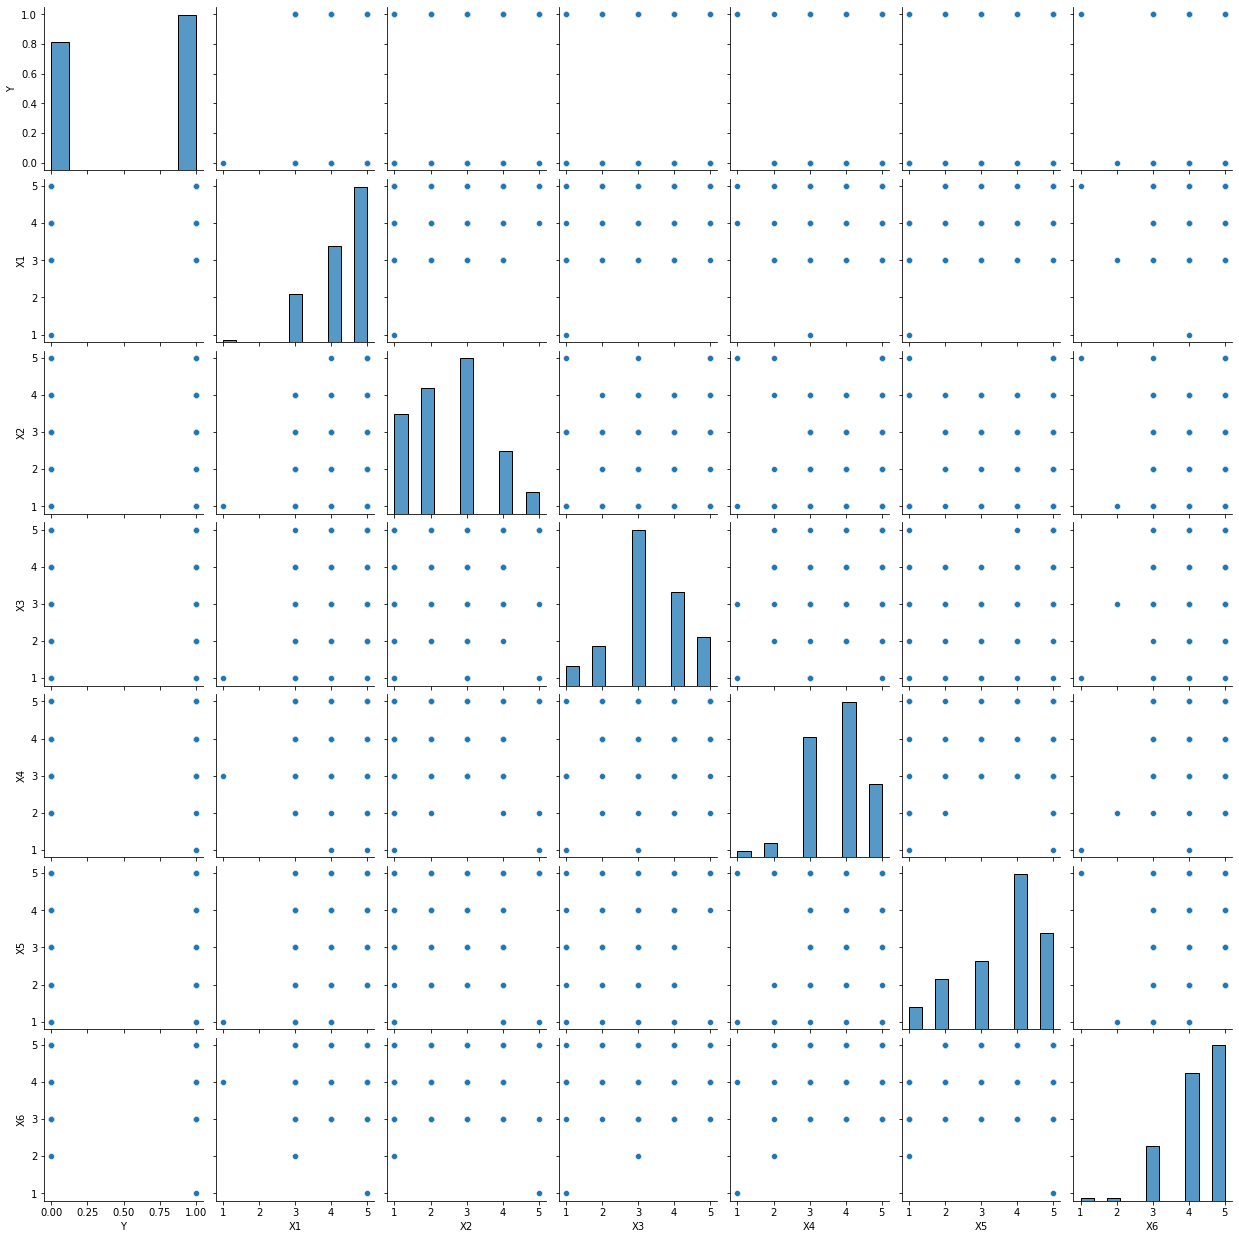

In [8]:
sns.pairplot(df)
plt.show()

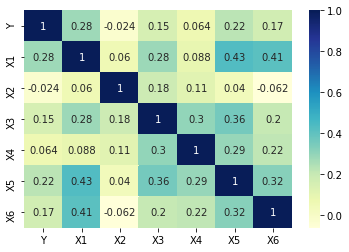

In [9]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [10]:
## There is not much coorelation between parameters, so there is very less chance of multicollinearity
##so we are not dropping any variables.

## Building the Model ##

In [11]:
x = df.drop(['Y'], axis = 1)

In [12]:
x.head()

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


In [13]:
y = df['Y']

In [14]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Y, dtype: int64

In [15]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

In [16]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,test_size=0.3 , random_state=100)

In [17]:
x_train.shape

(88, 6)

In [18]:
x_test.shape

(38, 6)

### Rescaling the features

In [19]:
#from sklearn.preprocessing import MinMaxScaler

In [20]:
#scaler = MinMaxScaler()

In [21]:
## we realized that rescaling the features does not add much value, so we skipped this step

In [22]:
#x_train[['X1','X2','X3','X4','X5','X6']] = scaler.fit_transform(x_train[['X1','X2','X3','X4','X5','X6']])
x_train

,X1,X2,X3,X4,X5,X6
23,5,1,2,5,2,4
78,5,3,3,3,2,5
108,5,2,4,4,5,5
20,4,2,3,3,4,4
69,5,4,5,5,5,5
...,...,...,...,...,...,...
87,4,1,3,4,4,3
103,4,3,4,4,3,4
67,4,1,1,3,4,4
24,4,3,3,3,3,4


In [23]:
#Scaling the test data set
#x_test[['X1','X2','X3','X4','X5','X6']] = scaler.fit_transform(x_test[['X1','X2','X3','X4','X5','X6']])
x_test

,X1,X2,X3,X4,X5,X6
11,4,4,3,4,4,4
109,5,3,4,4,4,4
104,4,1,3,5,3,5
113,5,1,4,4,4,5
57,4,4,4,4,3,4
29,5,3,3,3,5,3
33,3,2,4,4,4,5
85,5,2,3,4,4,5
26,3,3,3,5,5,5
88,5,4,2,4,3,5


### Model Development and Prediction

In [24]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

### Model evaluation using confusion matrix

In [25]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 9,  5],
       [ 8, 16]], dtype=int64)

### Visualizing Confusion Matrix using Heatmap

NameError: name 'Text' is not defined

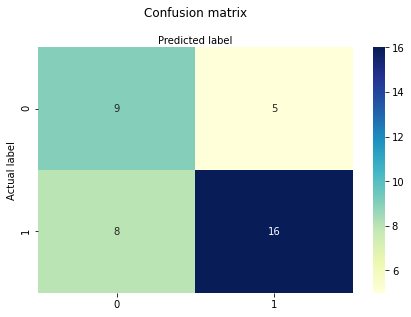

In [26]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label');

In [27]:
from sklearn.metrics import classification_report
target_names = ['Not satisfied', 'Satisfied']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

Not satisfied       0.53      0.64      0.58        14
    Satisfied       0.76      0.67      0.71        24

     accuracy                           0.66        38
    macro avg       0.65      0.65      0.65        38
 weighted avg       0.68      0.66      0.66        38



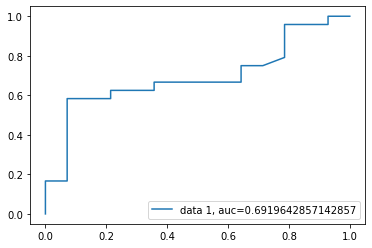

In [28]:
#ROC Curve
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Identiyfing feature importance

In [29]:
import statsmodels.api as sm

In [30]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   88
Model:                            GLM   Df Residuals:                       81
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -56.744
Date:                Wed, 04 Oct 2023   Deviance:                       113.49
Time:                        18:46:15   Pearson chi2:                     87.7
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7192      1.703     -2.184      0.029      -7.057      -0.382
X1             0.7247      0.369      1.964      0.049       0.002       1.448
X2            -0.0793      0.206     -0.384      0.701      -0.483       0.325
X3             0.1464      0.246      0.594      0.552      -0.337       0.629
X4             0.0744      0.256      0.291      0.771      -0.427       0.576
X5             0.1013      0.222      0.456      0.649      -0.335       0.537
X6            -0.0789      0.305     -0.259      0.796      -0.676       0.518
==============================================================================
"""

In [31]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,X1,35.94
5,X6,29.18
3,X4,16.35
4,X5,14.67
2,X3,13.86
1,X2,6.26


In [33]:
## From the above two results, its clear that x6 has highest p-value and also very high VIF,
## lets run the model again, after dropping x6

In [34]:
# Dropping highly correlated variables and insignificant variables

x_train_2 = x_train.drop('X6', 1,)
x_train_2.head()

,X1,X2,X3,X4,X5
23,5,1,2,5,2
78,5,3,3,3,2
108,5,2,4,4,5
20,4,2,3,3,4
69,5,4,5,5,5


In [35]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(x_train_2)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   88
Model:                            GLM   Df Residuals:                       82
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -56.778
Date:                Wed, 04 Oct 2023   Deviance:                       113.56
Time:                        18:46:38   Pearson chi2:                     87.5
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8319      1.643     -2.333      0.020      -7.051      -0.612
X1             0.6878      0.338      2.034      0.042       0.025       1.351
X2            -0.0754      0.206     -0.367      0.714      -0.479       0.328
X3             0.1405      0.245      0.573      0.566      -0.340       0.621
X4             0.0676      0.255      0.265      0.791      -0.432       0.567
X5             0.0948      0.221      0.429      0.668      -0.339       0.528
==============================================================================
"""

In [36]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_2.columns
vif['VIF'] = [variance_inflation_factor(x_train_2.values, i) for i in range(x_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,X1,23.08
3,X4,15.08
4,X5,14.51
2,X3,13.76
1,X2,6.26


In [37]:
## from aobve two results, let's try dropping x1
x_train_3 = x_train_2.drop('X1', 1,)
x_train_3.head()

,X2,X3,X4,X5
23,1,2,5,2
78,3,3,3,2
108,2,4,4,5
20,2,3,3,4
69,4,5,5,5


In [38]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(x_train_3)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   88
Model:                            GLM   Df Residuals:                       83
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59.013
Date:                Wed, 04 Oct 2023   Deviance:                       118.03
Time:                        18:47:09   Pearson chi2:                     87.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6046      1.125     -1.427      0.154      -3.809       0.600
X2            -0.0461      0.202     -0.228      0.819      -0.442       0.350
X3             0.1904      0.237      0.804      0.421      -0.274       0.655
X4             0.0348      0.251      0.139      0.889      -0.456       0.526
X5             0.2781      0.198      1.402      0.161      -0.111       0.667
==============================================================================
"""

#### NO point in dropping x1, lets select now only x1 and constant

In [40]:
x_train.head()

,X1,X2,X3,X4,X5,X6
23,5,1,2,5,2,4
78,5,3,3,3,2,5
108,5,2,4,4,5,5
20,4,2,3,3,4,4
69,5,4,5,5,5,5


In [48]:
x_train_4 = x_train[['X1']]

In [49]:
x_train_4.head()

,X1
23,5
78,5
108,5
20,4
69,5


In [50]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(x_train_4)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   88
Model:                            GLM   Df Residuals:                       86
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.225
Date:                Wed, 04 Oct 2023   Deviance:                       114.45
Time:                        18:53:06   Pearson chi2:                     87.6
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3656      1.365     -2.465      0.014      -6.041      -0.690
X1             0.7802      0.306      2.553      0.011       0.181       1.379
==============================================================================
"""

### Conclusion - For feature selection, it is proven that only X1 is the required parameter

### Builidng a model using Sklearn

In [56]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

x_test_4 = x_test[['X1']]

# fit the model with data
logreg.fit(x_train_4, y_train)

y_pred_4 = logreg.predict(x_test_4)

#### Model evaluation using confusion matrix

In [57]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_4)
cnf_matrix

array([[11,  3],
       [ 9, 15]], dtype=int64)

NameError: name 'Text' is not defined

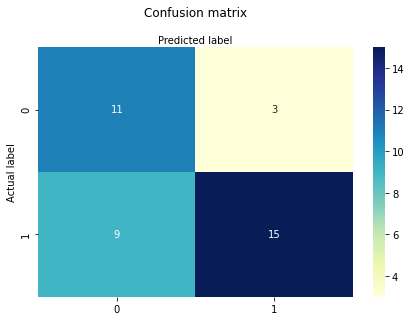

In [58]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label');

In [59]:
from sklearn.metrics import classification_report
target_names = ['Not satisfied', 'Satisfied']
print(classification_report(y_test, y_pred_4, target_names=target_names))

               precision    recall  f1-score   support

Not satisfied       0.55      0.79      0.65        14
    Satisfied       0.83      0.62      0.71        24

     accuracy                           0.68        38
    macro avg       0.69      0.71      0.68        38
 weighted avg       0.73      0.68      0.69        38



### We are getting accuracy of 68% which is greater than what we got with all the parameters, so this model is better

### Decision Tree Model building

In [39]:
#Building Decision tree
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('satisfaction.png')
Image(graph.create_png())

In [ ]:
pip install six